In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import plotly.express as px
import plotly.graph_objs as go
from dash import Dash, dcc, html, Input, Output, State
from plotly.subplots import make_subplots

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score, auc

In [5]:
def conf_matrix(fact, pred, labels):
    conf_test = confusion_matrix(fact, pred, normalize='true')
    #classes = fact.unique().astype(str)
    fig = px.imshow(
        conf_test, 
        text_auto='.2f', 
        color_continuous_scale='gray',
    labels = dict(x = 'Predicted', y = 'Actual'), x = labels, y = labels)
    
    fig.show()

# <center> Дерево решений </center>

### Классификация

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import tree

In [53]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = [1 if x==0 else -1 for x in iris.target]

In [71]:
feature_names=['sepal length (cm)', 'sepal width (cm)']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X[feature_names], y)

In [55]:
clf_1 = tree.DecisionTreeClassifier()

In [56]:
clf_1.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
pred_test_1 = clf_1.predict(X_test)

In [58]:
conf_matrix(y_test, pred_test_1, clf_1.classes_.astype(str))

*Вероятность принадлежности к классу* -- доля обучающих образцов данного класса в соответствующем листе дерева.

In [59]:
roc_auc_score(y_test, clf_1.predict_proba(X_test)[:,1])

0.9444444444444444

In [60]:
clf_1.score(X_test, y_test)

0.9736842105263158

In [61]:
accuracy_score(y_test, pred_test_1)

0.9736842105263158

[Text(0.4444444444444444, 0.9, 'sepal length (cm) <= 5.45\ngini = 0.464\nsamples = 112\nvalue = [71, 41]'),
 Text(0.2222222222222222, 0.7, 'sepal width (cm) <= 2.75\ngini = 0.139\nsamples = 40\nvalue = [3, 37]'),
 Text(0.3333333333333333, 0.8, 'True  '),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.5, 'sepal length (cm) <= 5.35\ngini = 0.051\nsamples = 38\nvalue = [1, 37]'),
 Text(0.2222222222222222, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(0.4444444444444444, 0.3, 'sepal width (cm) <= 3.2\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.7, 'sepal width (cm) <= 3.45\ngini = 0.105\nsamples = 72\nvalue = [68, 4]'),
 Text(0.5555555555555556, 0.8, '  False'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 66\nvalue = [66, 0]'),
 Text(0.777

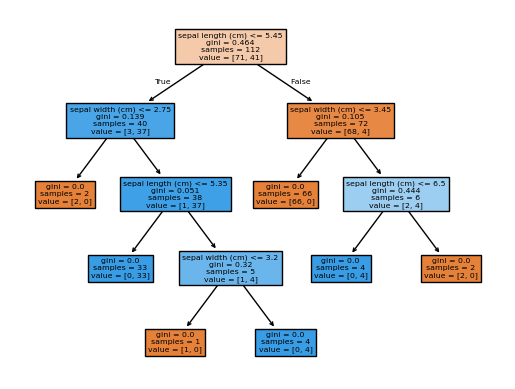

In [73]:
tree.plot_tree(clf_1, feature_names=feature_names, filled = True)

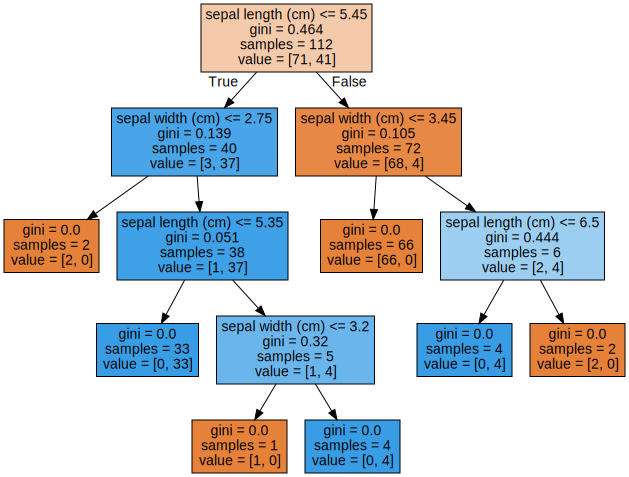

In [74]:
import graphviz
dot_data = tree.export_graphviz(clf_1, feature_names=feature_names, filled = True)
graph = graphviz.Source(dot_data)
graph

In [64]:
h = 0.02
x_min, x_max = X_train_1.iloc[:, 0].min() - 1, X_train_1.iloc[:, 0].max() + 1
y_min, y_max = X_train_1.iloc[:, 1].min() - 1, X_train_1.iloc[:, 1].max() + 1
xrange = np.arange(x_min, x_max, h)
yrange = np.arange(y_min, y_max, h)
xx, yy = np.meshgrid(xrange, yrange)

In [65]:
test_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns = clf_1.feature_names_in_)
Z = clf_1.predict(test_df)
Z = Z.reshape(xx.shape)
Z

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [ 1,  1,  1, ..., -1, -1, -1],
       [ 1,  1,  1, ..., -1, -1, -1],
       [ 1,  1,  1, ..., -1, -1, -1]])

In [66]:
fig = px.scatter(
    X, x = 'sepal length (cm)', 
    y='sepal width (cm)',
    #color = y
    
)
fig.update_traces(
    marker_color = y,
    marker_size=12, marker_line_width=1.5,
    marker_colorscale='RdBu'
    #marker_color="lightyellow"
);

In [67]:
fig.add_trace(
    go.Heatmap(
        x=xrange,
        y=yrange,
        z=Z,
        opacity=0.25,
        colorscale='RdBu',
    )
)
fig.update_layout(
    legend_orientation='h',
    title=dict(text='Prediction Confidence on Test Split')
)
fig.show()

In [70]:
clf_1.feature_importances_

array([0.80586563, 0.19413437])

In [76]:
feat_importances = pd.DataFrame(clf_1.feature_importances_, index=feature_names, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

In [78]:
px.bar(feat_importances, orientation = 'h')

### Задание 1

На данных по погрузкам обучить и настроить два дерева решений: 
1. Построенное только с использованием количественных признаков. 
2. Добавить номинативные показатели (для ввода номинативных показателей использовать LabelEncoder).
Для каждой модели: 
- подобрать оптимальные гиперпараметры; 
- оценить качество;
- оценить важность признаков;
- визуализировать дерево.

parameters:
- `criterion` - функция для оценки качества предиката. 
- `splitter` - стратегия выбора предиката в промежуточных вершинах дерева.
- `max_depth` - максимальная глубина дерева. 
- `min_samples_split` - минимальное количество наблюдений, требующихся для дальнейшего ветвления промежуточной вершины. 
- `min_samples_leaf` - минимальное количество наблюдений в листе. 
- `min_weight_fraction_leaf` - минимальная доля весов наблюдений попавших в лист, в общей доле весов (для данных с дисбалансом классов).
- `max_features` - количество признаков, рассматриваемых для выбора лучшего предиката. 
- `max_leaf_nodes` - максимльное количество листьев. 
- `min_impurity_decrease` - пороговая величина изменения количества примесей.